In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data',download=True,train=True,transform=transform)

Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

'plane' 'horse' 'ship' 'ship'


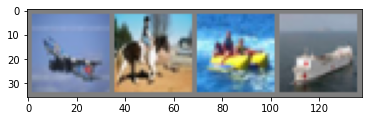

In [5]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane','car','bird', 'cat','deer','dog','frog','horse','ship','truck')

def imshow(img):
    img = img / 2+0.5 #un normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

# get some random training images..
dataiter = iter(trainloader)
images,labels = dataiter.next()
#show images()
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5a' % classes[labels[j]]for j in range(4)))

# this is the model we will train on LeNet

In [6]:
import torch.nn as nn

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1= nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()


# loss func and optimizer...

In [8]:
from torch.optim import SGD
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [9]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss = loss.item()
        if i %2000== 1999:
            print('[%d,%8d] loss: %.5f' %
                  (epoch+1,i+1 ,running_loss/2000))
            running_loss =0.0

print("finished Training")

[1,    2000] loss: 0.00122
[1,    4000] loss: 0.00071
[1,    6000] loss: 0.00106
[1,    8000] loss: 0.00107
[1,   10000] loss: 0.00112
[1,   12000] loss: 0.00090
[2,    2000] loss: 0.00084
[2,    4000] loss: 0.00088
[2,    6000] loss: 0.00086
[2,    8000] loss: 0.00089
[2,   10000] loss: 0.00089
[2,   12000] loss: 0.00078
finished Training


In [10]:
testset = torchvision.datasets.CIFAR10(root = './data',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

Files already downloaded and verified


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print("Accuracy of the network on the 1000 test images : %d %%"%(100*correct/total))

Accuracy of the network on the 1000 test images : 22 %
